# [IAPR 2018:][iapr2018] Lab 3 ‒  Classification

**Author:** Milica Novakovic Number:281861  
**Due date:** 25.05.2018

[iapr2018]: https://github.com/LTS5/iapr-2018

## Extract relevant data
We first need to extract the `lab-03-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-03-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1
In this part, we will study classification based on the data available in the Matlab file `classification.mat` that you will under `lab-03-data/part1`.
There are 3 data sets in this file, each one being a training set for a given class.
They are contained in variables `a`, `b` and `c`.

**Note**: we can load Matlab files using the [scipy.io] module.

[scipy.io]: https://docs.scipy.org/doc/scipy/reference/io.html

In [2]:
import scipy.io

data_part1_path = os.path.join(data_base_path, data_folder, 'part1', 'classification.mat')
matfile = scipy.io.loadmat(data_part1_path)
a = matfile['a']
b = matfile['b']
c = matfile['c']

print(a.shape, b.shape, c.shape)

(200, 2) (200, 2) (200, 2)


### 1.1 Bayes method
Using the Bayes method, give the analytical expression of the separation curves between those three classes.
Do reasonable hypotheses about the distributions of those classes and estimate the corresponding parameters based on the given training sets.
Draw those curves on a plot, together with the training data.
For simplicity reasons, round the estimated parameters to the closest integer value.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

First we plot the data in order to guess the distrubution of data.

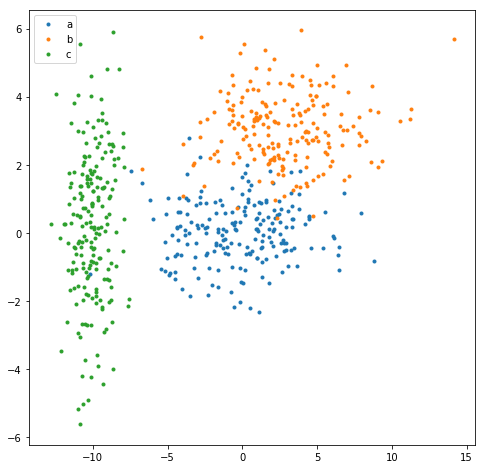

In [4]:
plt.figure(figsize=(8,8));
plt.scatter(a[:,0],a[:,1],label="a",marker=".");
plt.scatter(b[:,0],b[:,1],label="b",marker=".");
plt.scatter(c[:,0],c[:,1],label="c",marker=".");
plt.legend();

With Bayes method, we know that we want to maximize :
$$
\mathbb{P}(x|w)\mathbb{P}(w)
$$
Now we can do the hypotheses that :(With observing the data in the plot)
$$
\mathbb{P}(x|w_i)\sim\mathcal{N}(\mu_i,\Sigma_i)
$$
where every class has there own $\mu_i,\Sigma_i$, where $i \in \{a,b,c\}$.Because we can see from the graph the data seems to be independent from each axis, so we can assume that $\Sigma_i$ is a diagonal matrix .And we can estimate the $\mu_i$ and the $\Sigma_i$ by:
$$
\mu_i=\frac{1}{N_i}\sum x_i\\
\Sigma_i=\frac{1}{N_i}\sum (x_i-\mu_i)(x_i-\mu_i)^T\\
$$
We take the discriminant function $f$ as $f(x)=\ln x$, and we know that
$$
\mathbb{P}(w_i|x)\propto \mathbb{P}(x|w_i)\mathbb{P}(w_i)
$$
For two classes $i$ and $j$, the decision surface satisfy that :
$$
g_i(x)=g_j(x)
$$
where :
$$
g_i(x)=f(\mathbb{P}(w_i|x))
$$
For $\mathbb{P}(w_i)$, we can estimate by using the frequency to estimate the probability.

If we note the whole sample number is $N$ ,and the sample number of each class is $N_i$, where $i \in \{a,b,c\}$.Then:
$$
\mathbb{P}(w_i)=\frac{N_i}{N}
$$
So we insert all we want to get the equation:
$$
\ln(\mathbb{P}(w_i))-\frac{1}{2}(x-\mu_i)^T\Sigma_i^{-1}(x-\mu_i)-\frac{1}{2}\ln(|\Sigma_i|)=\ln(\mathbb{P}(w_j))-\frac{1}{2}(x-\mu_j)^T\Sigma_j^{-1}(x-\mu_j)-\frac{1}{2}\ln(|\Sigma_j|)
$$

When $x$ is only two dimension vector, we can write this equation in scalar type:
$$
\ln(\sigma_{j1}\sigma_{j2})-\ln(\sigma_{i1}\sigma_{i2})+2(\ln(\mathbb{P}(w_i))-\ln(\mathbb{P}(w_j)))=\frac{1}{\sigma_{i1}^2}(x_1-\mu_{i1})^2+\frac{1}{\sigma_{i2}^2}(x_2-\mu_{i2})^2-\frac{1}{\sigma_{j1}^2}(x_1-\mu_{j1})^2-\frac{1}{\sigma_{j2}^2}(x_2-\mu_{j2})^2
$$
We can simplify this equation:
$$
\ln\frac{\sigma_{j1}\sigma_{j2}}{\sigma_{i1}\sigma_{i2}}+2(\ln(\mathbb{P}(w_i))-\ln(\mathbb{P}(w_j)))+\frac{\mu^2_{j1}}{\sigma^2_{j1}}+\frac{\mu^2_{j2}}{\sigma^2_{j2}}-\frac{\mu^2_{i1}}{\sigma^2_{i1}}-\frac{\mu^2_{i2}}{\sigma^2_{i2}}= (\frac{2\mu_{j1}}{\sigma^2_{j1}}-\frac{2\mu_{i1}}{\sigma^2_{i1}})x_1+(\frac{2\mu_{j2}}{\sigma^2_{j2}}-\frac{2\mu_{i2}}{\sigma^2_{i2}})x_2+(\frac{1}{\sigma^2_{i1}}-\frac{1}{\sigma^2_{j1}})x_1^2+(\frac{1}{\sigma^2_{i2}}-\frac{1}{\sigma^2_{j2}})x_2^2
$$
In our problem, since the number of each class equals(all is 200), so we can remove the term $2(\ln(\mathbb{P}(w_i))-\ln(\mathbb{P}(w_j)))$ when computing.We can see from the equation this boundary should be a quadratic curve if the coefficient of the quadratic term is not zero.

Now we try to draw this curve,first we estimate the $\mu$ and the $\Sigma$.

In [5]:
mu_a = a.mean(axis=0).round()
mu_b = b.mean(axis=0).round()
mu_c = c.mean(axis=0).round()

In [6]:
print ("mu_a is :")
print (mu_a)
print ("mu_b is :")
print (mu_b)
print ("mu_c is :")
print (mu_c)

mu_a is :
[-0.  0.]
mu_b is :
[ 3.  3.]
mu_c is :
[-10.   0.]


In [7]:
Sigma_a = np.diag(np.cov(a.transpose())).round()
Sigma_b = np.diag(np.cov(b.transpose())).round()
Sigma_c = np.diag(np.cov(c.transpose())).round()

In [8]:
print ("Sigma_a is :")
print (Sigma_a)
print ("Sigma_b is :")
print (Sigma_b)
print ("Sigma_c is :")
print (Sigma_c)

Sigma_a is :
[ 10.   1.]
Sigma_b is :
[ 10.   1.]
Sigma_c is :
[ 1.  5.]


Now we define a function compute the contour.The equation contour(x1,x2)=0 is the curve that we want to draw.

In [9]:
def contour(x1,x2,mu_1,sigma_1,mu_2,sigma_2):
    left = np.sum(mu_1**2/sigma_1-mu_2**2/sigma_2)-0.5*np.log(sigma_2[0]*sigma_2[1])+0.5*np.log(sigma_1[0]*sigma_1[1])
    right_1_1 = 2*mu_1[0]/sigma_1[0]-2*mu_2[0]/sigma_2[0]
    right_1_2 = 2*mu_1[1]/sigma_1[1]-2*mu_2[1]/sigma_2[1]   
    right_2_1 = 1/sigma_2[0]-1/sigma_1[0]
    right_2_2 = 1/sigma_2[1]-1/sigma_1[1]
    return left-right_1_1*x1-right_1_2*x2-right_2_1*x1**2-right_2_2*x2**2

Now we can see our results.Since the contour turns out to be Hyperbola , in order to keep the useful part of the hyperpolar, we need to set limits in the x1,x2 grid.

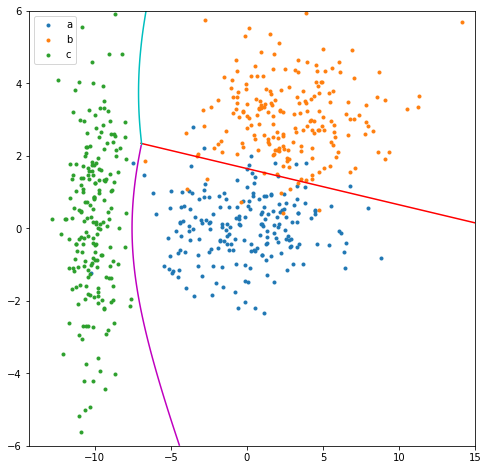

In [10]:
plt.figure(figsize=(8,8));
# Plot the train data
plt.scatter(a[:,0],a[:,1],label="a",marker=".");
plt.scatter(b[:,0],b[:,1],label="b",marker=".");
plt.scatter(c[:,0],c[:,1],label="c",marker=".");
# Set the limits for the curve between a and b
x1 = np.linspace(-7,15,100)  
x2 = np.linspace(-6,6,100)
x1,x2 = np.meshgrid(x1,x2)
# This is a line,in fact.Because the covariance matrix of a and b are same.The quadratic term disappears
plt.contour(x1,x2,contour(x1,x2,mu_a,Sigma_a,mu_b,Sigma_b),[0],colors="r")
# Set the limits for the curve between c and b
x1 = np.linspace(-10,15,100)
x2 = np.linspace(2.3,6,100)
x1,x2 = np.meshgrid(x1,x2)
# This is a hyperpola
plt.contour(x1,x2,contour(x1,x2,mu_b,Sigma_b,mu_c,Sigma_c),[0],colors="c")
# Set the limits for the curve between c and a
x1 = np.linspace(-10,-4,100)
x2 = np.linspace(-6,2.3,100)
x1,x2 = np.meshgrid(x1,x2)
# This is a hyperpola
plt.contour(x1,x2,contour(x1,x2,mu_c,Sigma_c,mu_a,Sigma_a),[0],colors="m")
plt.legend();

### 1.2 Mahalanobis distance
For classes `a` and `b`, give the expression of the Mahalanobis distance used to classify a point in class `a` or `b`, and verify the obtained classification, in comparison with the "complete" Bayes classification, for a few points of the plane.


The Mahalanobis distance is defined as $(x-\mu)^T\Sigma^{-1}(x-\mu)$.Now we classify the data by caculating to which cluster the data has the minimum Mahalanobis distance.

In [11]:
import scipy.spatial.distance

In [12]:
# Stack the data together
all_data = list(np.vstack([a,b,c]))

In [13]:
# Define the function to compute the Mahalanobis distance
d_a = lambda x : scipy.spatial.distance.mahalanobis(x.reshape(-1), mu_a.reshape(-1), np.diag(1/Sigma_a))
d_b = lambda x : scipy.spatial.distance.mahalanobis(x.reshape(-1), mu_b.reshape(-1), np.diag(1/Sigma_b))
d_c = lambda x : scipy.spatial.distance.mahalanobis(x.reshape(-1), mu_c.reshape(-1), np.diag(1/Sigma_c))

In [14]:
# Find the minimum Mahalanobis distance
dist_a = np.array(list(map(d_a,all_data))).reshape(-1,1)
dist_b = np.array(list(map(d_b,all_data))).reshape(-1,1)
dist_c = np.array(list(map(d_c,all_data))).reshape(-1,1)
dist_min = np.argmin(np.hstack([dist_a,dist_b,dist_c]),axis=1)
all_data = np.array(all_data)

In [15]:
# Do prediction
pred_a = all_data[dist_min==0,:]
pred_b = all_data[dist_min==1,:]
pred_c = all_data[dist_min==2,:]

We define a function to compute the boundary of Mahalanobis distance classifier.This is almost the same with last question except one term with determinant in the left equation.

In [16]:
def contour2(x1,x2,mu_1,sigma_1,mu_2,sigma_2):
    left = np.sum(mu_1**2/sigma_1-mu_2**2/sigma_2)#-0.5*np.log(sigma_2[0]*sigma_2[1])+0.5*np.log(sigma_1[0]*sigma_1[1])
    right_1_1 = 2*mu_1[0]/sigma_1[0]-2*mu_2[0]/sigma_2[0]
    right_1_2 = 2*mu_1[1]/sigma_1[1]-2*mu_2[1]/sigma_2[1]   
    right_2_1 = 1/sigma_2[0]-1/sigma_1[0]
    right_2_2 = 1/sigma_2[1]-1/sigma_1[1]
    return left-right_1_1*x1-right_1_2*x2-right_2_1*x1**2-right_2_2*x2**2

Now we visualize our results.This time, the color of the points shows the **label of prediction with Mahalanobis distance,not the train data**!!!We also put the boundary got by the last question in this plot (with colors red, cyan and magenta) and the boundaries of new Mahalanobis classifier (with colors red, gold and lime).

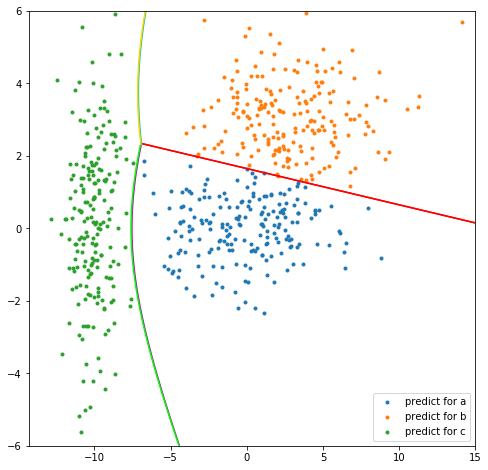

In [17]:
plt.figure(figsize=(8,8));
# Plot the data (color means the label of prediction with Mahalanobis distance)
plt.scatter(pred_a[:,0],pred_a[:,1],label="predict for a",marker=".");
plt.scatter(pred_b[:,0],pred_b[:,1],label="predict for b",marker=".");
plt.scatter(pred_c[:,0],pred_c[:,1],label="predict for c",marker=".");
# Set the limits for the curve between a and b
x1 = np.linspace(-7,15,100)  
x2 = np.linspace(-6,6,100)
x1,x2 = np.meshgrid(x1,x2)
# This is a line,in fact.Because the covariance matrix of a and b are same.The quadratic term disappears
plt.contour(x1,x2,contour(x1,x2,mu_a,Sigma_a,mu_b,Sigma_b),[0],colors="r")
plt.contour(x1,x2,contour2(x1,x2,mu_a,Sigma_a,mu_b,Sigma_b),[0],colors="r")
# Set the limits for the curve between c and b
x1 = np.linspace(-10,15,100)
x2 = np.linspace(2.3,6,100)
x1,x2 = np.meshgrid(x1,x2)
# This is a hyperpola
plt.contour(x1,x2,contour(x1,x2,mu_b,Sigma_b,mu_c,Sigma_c),[0],colors="c")
plt.contour(x1,x2,contour2(x1,x2,mu_b,Sigma_b,mu_c,Sigma_c),[0],colors="gold")
# Set the limits for the curve between c and a
x1 = np.linspace(-10,-4,100)
x2 = np.linspace(-6,2.3,100)
x1,x2 = np.meshgrid(x1,x2)
# This is a hyperpola
plt.contour(x1,x2,contour(x1,x2,mu_c,Sigma_c,mu_a,Sigma_a),[0],colors="m")
plt.contour(x1,x2,contour2(x1,x2,mu_c,Sigma_c,mu_a,Sigma_a),[0],colors="lime")
plt.legend();

We can see that all data get the exactly the same label with both bayes classifier and the Mahalanobis distance classifier, we observe pair of lines almost overlap: lime(line for Bayesian classifier)-magenta (line for Mahalanobis distance) pair of lines and cyan(line for Bayesian classifier) - gold (line for Mahalanobis distance) pair of lines. As we expect. the red line keeps the same in both cases. That match the theory because:

With Bayes method, we want to maximize :
$$
\mathbb{P}(x|w_i)\mathbb{P}(w_i)=\ln(\mathbb{P}(w_i))-\frac{1}{2}(x-\mu_i)^T\Sigma_i^{-1}(x-\mu_i)-\frac{1}{2}\ln(|\Sigma_i|)
$$
So when every class has the same prior probability $\mathbb{P}(w_i)$, the classification is equivalent to minimize Mahalanobis distance $(x-\mu_i)^T\Sigma_i^{-1}(x-\mu_i)$ when $\Sigma_i=\Sigma_j$.But since the logarithm term of the ratio of the determinants is so small , so it didn't affect so much. So it gives exactly same labels to all points with both classifiers in our problem.(Though the boundaries changed a very little bit)

## Part 2
In this part, we aim to classify digits using the complete version of MNIST digits dataset.
The dataset consists of 60'000 training images and 10'000 test images of handwritten digits.
Each image has size 28x28, and has assigned a label from zero to nine, denoting the digits value.
Given this data, your task is to construct a Multilayer Perceptron (MLP) for supervised training and classification and evaluate it on the test images.

Download the MNIST dataset (all 4 files) from http://yann.lecun.com/exdb/mnist/ under `lab-03-data/part2`.
You can then use the script provided below to extract and load training and testing images in Python.

To create an MLP you are free to choose any library.
In case you don't have any preferences, we encourage you to use the [scikit-learn] package; it is a simple, efficient and free tool for data analysis and machine learning.
In this [link][sklearn-example], you can find a basic example to see how to create and train an MLP using [scikit-learn].
Your network should have the following properties:
* Input `x`: 784-dimensional (i.e. 784 visible units representing the flattened 28x28 pixel images).
* 100 hidden units `h`.
* 10 output units `y`, i.e. the labels, with a value close to one in the i-th class representing a high probability of the input representing the digit `i`.

If you need additional examples you can borrow some code from image classification tutorials.
However, we recommend that you construct a minimal version of the network on your own to gain better insights.

[scikit-learn]: http://scikit-learn.org/stable/index.html
[sklearn-example]: http://scikit-learn.org/stable/modules/neural_networks_supervised.html

### 2.1 Dataset loading
Here we first declare the methods `extract_data` and `extract_labels` so that we can reuse them later in the code.
Then we extract both the data and corresponding labels, and plot randomly some images and corresponding labels of the training set.

In [18]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

def extract_data(filename, image_shape, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(np.prod(image_shape) * image_number)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(image_number, image_shape[0], image_shape[1])
    return data


def extract_labels(filename, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * image_number)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [19]:
image_shape = (28, 28)
train_set_size = 60000
test_set_size = 10000

data_part2_folder = os.path.join(data_base_path, data_folder, 'part2')

train_images_path = os.path.join(data_part2_folder, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_part2_folder, 'train-labels-idx1-ubyte.gz')
test_images_path = os.path.join(data_part2_folder, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_part2_folder, 't10k-labels-idx1-ubyte.gz')

train_images = extract_data(train_images_path, image_shape, train_set_size)
test_images = extract_data(test_images_path, image_shape, test_set_size)
train_labels = extract_labels(train_labels_path, train_set_size)
test_labels = extract_labels(test_labels_path, test_set_size)

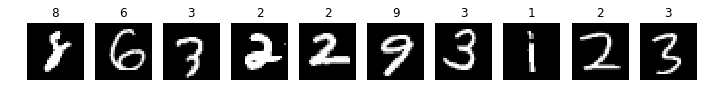

In [20]:
prng = np.random.RandomState(seed=123456789)  # seed to always re-draw the same distribution
plt_ind = prng.randint(low=0, high=train_set_size, size=10)

fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for ax, im, lb in zip(axes, train_images[plt_ind], train_labels[plt_ind]):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(lb)

### 2.2 MLP

We use Pytorch to implement MLP because Pytorch is a very powerful tool of building neural networks.Also, it can use GPU to train which saves a lot of time.

In [21]:
from torch import cuda    
import torch
from torch.autograd import Variable

In [22]:
# Get the value in the Tensor
def evalTensor(x):
    # If Tensor in GPU,first move to CPU
    if cuda.is_available():
        x = x.cpu()
    return x.numpy()

In [23]:
#Use sequential model to build a MLP
model = torch.nn.Sequential(
          torch.nn.Linear(784, 100),
          torch.nn.Linear(100,10),
        )

# Use cross entropy as a loss function
loss_fn = torch.nn.CrossEntropyLoss(size_average=True)

In [24]:
index = list(range(train_images.shape[0]))
# Change the data to Pytorch Variable.Also, normalize the data to [0,1] for improving the performance of MLP
train_input = Variable(torch.FloatTensor(train_images.reshape(train_images.shape[0],-1)))/255
test_input = Variable(torch.FloatTensor(test_images.reshape(test_images.shape[0],-1)))/255
train_target = Variable(torch.LongTensor(train_labels))
test_target = Variable(torch.LongTensor(test_labels))

# If GPU can be used, then train on GPU
if cuda.is_available():
    model.cuda()
    loss_fn.cuda()
    train_input,train_target = train_input.cuda(), train_target.cuda()
    test_input,test_target = test_input.cuda(), test_target.cuda()

In [25]:
# Use adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)
loss_list=[]
err_rate_train = []
err_rate_test = []
# Train 60 epochs, with a batchsize 100
nb_epochs = 60
batch_size = 100

In [26]:
for k in range (nb_epochs):
    for b in range (0,train_input.size(0),batch_size):
        if cuda.is_available():
            choose = torch.cuda.LongTensor(np.random.choice(index,batch_size))
        else:
            choose = torch.LongTensor(np.random.choice(index,batch_size))
        # Choose the data of this batch    
        batch_x = train_input[choose]
        batch_y = train_target[choose]
        # Do forward pass
        y_pred = model(batch_x)
        # Compute loss
        loss = loss_fn(y_pred, batch_y)
        # Every 30000 steps print a loss
        if b%30000==0:
            print("Epoch :",k,"Step :",b, loss.data[0])
        loss_list.append(loss.data[0])
        # Zero the gradients before running the backward pass.
        optimizer.zero_grad()
        # Do backward pass
        loss.backward()      
        # Update the paraneters
        optimizer.step()
        predict_train = model.forward(train_input)
        # Get the most probable label
        _ , predict_train = torch.max(predict_train.data, 1)  
        # Compute the error rate
        err_rate_train.append(np.mean((evalTensor(predict_train)-train_target.data)!=0))
        # Compute the same thing for test set
        predict_test = model.forward(test_input)
        _ , predict_test = torch.max(predict_test.data, 1)
        err_rate_test.append(np.mean((evalTensor(predict_test)-test_target.data)!=0))

Epoch : 0 Step : 0 2.294295072555542
Epoch : 0 Step : 30000 0.9199527502059937
Epoch : 1 Step : 0 0.413634330034256
Epoch : 1 Step : 30000 0.3656582534313202
Epoch : 2 Step : 0 0.498860239982605
Epoch : 2 Step : 30000 0.3420681357383728
Epoch : 3 Step : 0 0.37715092301368713
Epoch : 3 Step : 30000 0.20907336473464966
Epoch : 4 Step : 0 0.3861341178417206
Epoch : 4 Step : 30000 0.3001015782356262
Epoch : 5 Step : 0 0.23517048358917236
Epoch : 5 Step : 30000 0.2569495439529419
Epoch : 6 Step : 0 0.25792980194091797
Epoch : 6 Step : 30000 0.32384514808654785
Epoch : 7 Step : 0 0.20228521525859833
Epoch : 7 Step : 30000 0.27581489086151123
Epoch : 8 Step : 0 0.1733558624982834
Epoch : 8 Step : 30000 0.5299331545829773
Epoch : 9 Step : 0 0.3778553009033203
Epoch : 9 Step : 30000 0.15965640544891357
Epoch : 10 Step : 0 0.27341756224632263
Epoch : 10 Step : 30000 0.36079397797584534
Epoch : 11 Step : 0 0.23077458143234253
Epoch : 11 Step : 30000 0.2526553273200989
Epoch : 12 Step : 0 0.188735

train_error:
0.0641
test_error:
0.0729


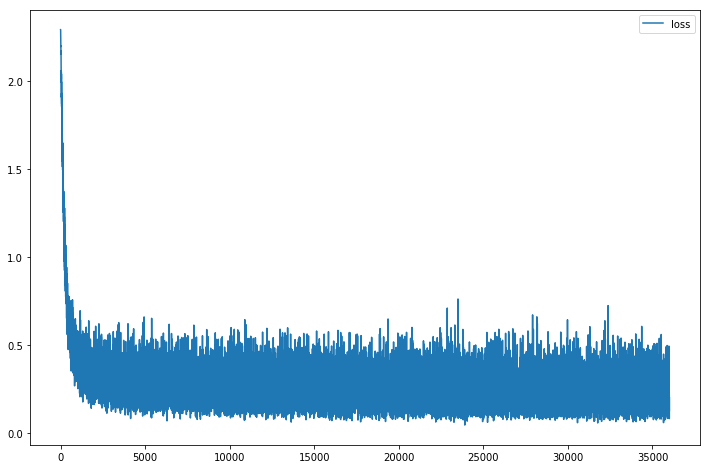

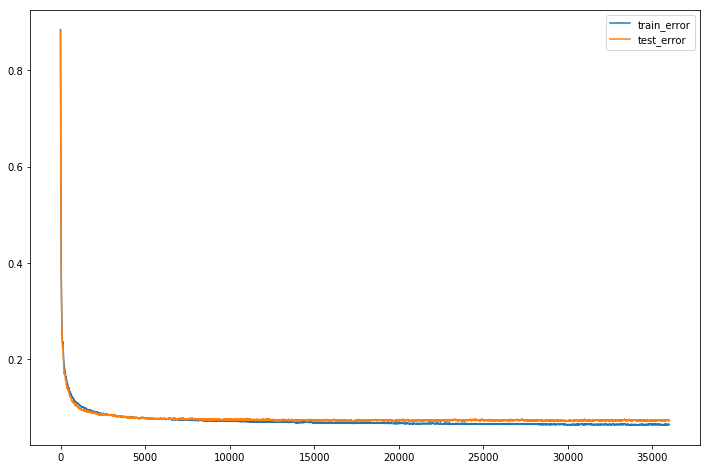

In [27]:
# Print the training set error rate after training
predict_train = model.forward(train_input)
_ , predict_train = torch.max(predict_train.data, 1)
print ("train_error:")
print (np.mean((evalTensor(predict_train)-train_target.data)!=0))

# Plot the loss curve
plt.figure(figsize=(12, 8))
plt.plot(range(len(loss_list)),loss_list,label="loss")
plt.legend()
plt.figure(figsize=(12, 8))
plt.plot(range(len(loss_list)),err_rate_train,label="train_error")
plt.plot(range(len(loss_list)),err_rate_test,label="test_error")
plt.legend()

# Print the test set error rate after training
predict_test = model.forward(test_input)
_ , predict_test = torch.max(predict_test.data, 1)
print ("test_error:")
print (np.mean((evalTensor(predict_test)-test_target.data)!=0))

We can find that the MLP is a little overfited.But still, it achieves great result.The MLP classifier is a really powerful classifier , and also it builds a foundation for the most popular deep learning techniques now.